# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training network for skin_tone requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', 'skin_tone'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': [cts.ICAO_REQ.SKIN_TONE],
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'save_trained_model': False
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 25,
        'early_stopping': 10,
        'shuffle': True,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training network for skin_tone requisite',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'skin_tone']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f653e7d7e50>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 25,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
                      'validation_prop': 0.05,
                      'validation_split': 0.1},
 'properties': {'aligned': True,
                'bala

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 4)
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 4926 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5761


# Labels Distribution

In [7]:
trainer.summary_labels_dist()

Requisite: SKIN_TONE
N_TRAIN_VALID_COMP: 3084 (56.35%)
N_TRAIN_VALID_NOT_COMP: 2389 (43.65%)
N_TRAIN_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 169 (58.68%)
N_TEST_NOT_COMP: 119 (41.32%)
N_TEST_DUMMY: 0 (0.0%)
----


<AxesSubplot:>

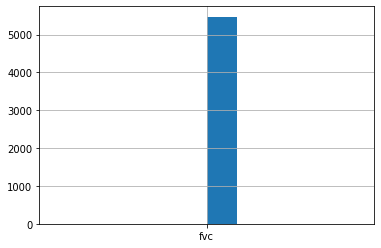

In [8]:
trainer.train_data.origin.hist()

# Use Neptune

In [9]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-103


# Create Model

In [10]:
trainer.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [11]:
trainer.train_model()

Training VGG16 network
Epoch 1/25
76/76 [==============================] - 79s 1s/step - loss: 0.5932 - accuracy: 0.6808 - val_loss: 0.5703 - val_accuracy: 0.7012
Epoch 2/25
76/76 [==============================] - 40s 532ms/step - loss: 0.5118 - accuracy: 0.7437 - val_loss: 0.5243 - val_accuracy: 0.7578
Epoch 3/25
76/76 [==============================] - 40s 527ms/step - loss: 0.4937 - accuracy: 0.7616 - val_loss: 0.5469 - val_accuracy: 0.7363
Epoch 4/25
76/76 [==============================] - 41s 535ms/step - loss: 0.4779 - accuracy: 0.7698 - val_loss: 0.4999 - val_accuracy: 0.7578
Epoch 5/25
76/76 [==============================] - 40s 532ms/step - loss: 0.4612 - accuracy: 0.7676 - val_loss: 0.4932 - val_accuracy: 0.7695
Epoch 6/25
76/76 [==============================] - 40s 528ms/step - loss: 0.4446 - accuracy: 0.7851 - val_loss: 0.5117 - val_accuracy: 0.7520
Epoch 7/25
76/76 [==============================] - 41s 534ms/step - loss: 0.4558 - accuracy: 0.7834 - val_loss: 0.4898 - 

# Plots

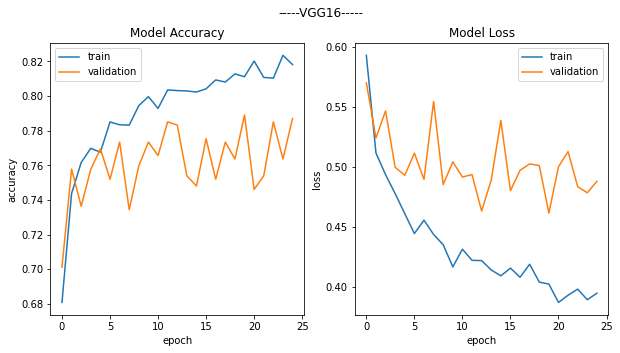

In [12]:
trainer.draw_training_history()

# Load Best Model

In [13]:
trainer.load_best_model()

..Loading checkpoint
..Checkpoint weights loaded


# Saving Trained Model

# Test Trained Model

In [14]:
trainer.test_model()

Testing Trained Model
Requisite: SKIN_TONE
              precision    recall  f1-score   support

    NON_COMP       0.85      0.76      0.81       119
        COMP       0.85      0.91      0.87       169

    accuracy                           0.85       288
   macro avg       0.85      0.84      0.84       288
weighted avg       0.85      0.85      0.85       288

Model Accuracy: 0.8472


# Evaluate Model

In [15]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.4058
TEST accuracy:  0.8472


# Vizualize Model Classification

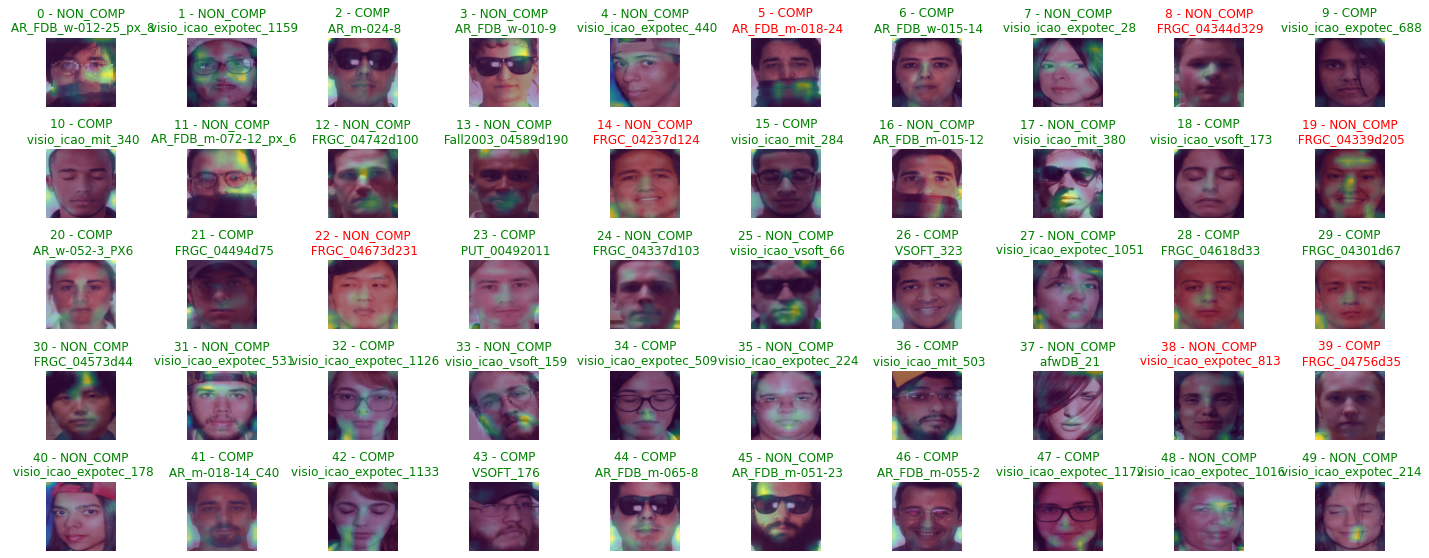

In [16]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [17]:
trainer.finish_experiment()

Finishing Neptune
